In [187]:
#add dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import scipy.stats as sts

In [188]:
#import the csv datasets
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [189]:
#read the city data file and store it in a pandas df
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [190]:
#read the ride data file and store it in a pandas df
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [191]:
#get the columns and rows that are not null 
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [192]:
#get the columns and rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [193]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [194]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [195]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [196]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [197]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [198]:
sum(city_data_df["type"] == "Urban")

66

In [199]:
sum(city_data_df["type"] == "Suburban")

36

In [200]:
sum(city_data_df["type"] == "Rural")

18

In [201]:
#merge the datafames
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [202]:
#goals
#1. average fare for each type of city on y axis'
#2. total number of rides on x_axis
#3. bubble size equals number of drivers

#Steps
#to calculate separate data into 3 groups by type
#calculate the mean far rate of each city's fare amount, sum the number of rides and the driveers
#create 3 scatter plots, 1 for each type of city with variables being (average fare, number of drivers, number of rides)
#set the scatter plot x axis to number of rides, y axis to avg fare, and then the s of the dots to be equal to the number of drivers for that city. 


In [203]:
#Create 3 df's for the types
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [204]:
#create counts of # of rides per city
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [205]:
#create average fare calculatiosn for each city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]


In [206]:
#get average number of drivers per city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

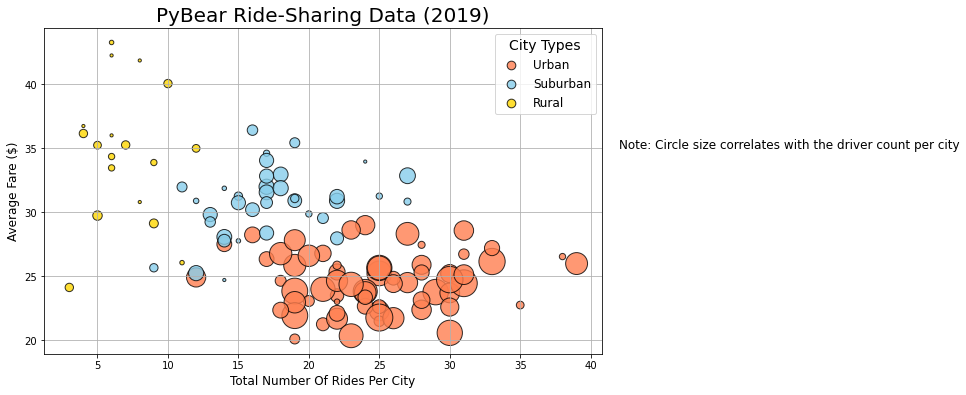

In [285]:
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color="coral", edgecolor="k", label="Urban", alpha=0.8, linewidths=1)
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, color="skyblue", edgecolor="k", label="Suburban", alpha=0.8, linewidths=1)
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, color="gold", edgecolor="k", label="Rural", alpha=0.8, linewidths=1)
plt.xlabel("Total Number Of Rides Per City", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.title("PyBear Ride-Sharing Data (2019)", fontsize=20)

#create a legend
lgnd=plt.legend(fontsize=12, mode="expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(14)

plt.grid(True)

#add note to let reader know that the size of the bubble equals the number of drivers
plt.text(42, 35, "Note: Circle size correlates with the driver count per city", fontsize=12)
plt.savefig("analysis/fig1.png")
plt.show()



In [208]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [209]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [210]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [211]:
urban_ride_count.describe()


count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [212]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [213]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [214]:
#calculate the mean for each city type using mean()
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [215]:
round(urban_ride_count.median(), 2)

24.0

In [216]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [217]:
suburban_ride_count.mode()

0    17
dtype: int64

In [229]:
#calculate measures of central tendencies with numpy/scipy
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urabn trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urabn trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

print("-----------------------------------------------")

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburabn trips is {mean_suburban_ride_count:.2f}.")

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")


The mean for the ride counts for urabn trips is 24.62.
The median for the ride counts for urabn trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).
-----------------------------------------------
The mean for the ride counts for suburabn trips is 17.36.
The mean for the ride counts for rural trips is 6.94.


In [231]:
suburban_ride_count_mode = sts.mode(suburban_ride_count)

suburban_ride_count_mode

ModeResult(mode=array([17]), count=array([7]))

In [232]:
rural_ride_count_mode = sts.mode(rural_ride_count)

rural_ride_count_mode

ModeResult(mode=array([6]), count=array([5]))

In [240]:
#get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [238]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [241]:
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for usubrban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for usubrban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [242]:
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [246]:
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

In [249]:
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of urban drivers is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of urban is ${median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode of urban dirvers is {mode_urban_drivers}.")

print("---------------------------------------------------")

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of suburban drivers is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of suburban is ${median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode of suburban dirvers is {mode_suburban_drivers}.")

print("---------------------------------------------------")

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of rural drivers is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of rural is ${median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode of rural dirvers is {mode_rural_drivers}.")

print("---------------------------------------------------")

The mean number of urban drivers is 36.68.
The median number of urban is $37.00.
The mode of urban dirvers is ModeResult(mode=array([39]), count=array([86])).
---------------------------------------------------
The mean number of suburban drivers is 13.71.
The median number of suburban is $16.00.
The mode of suburban dirvers is ModeResult(mode=array([20]), count=array([79])).
---------------------------------------------------
The mean number of rural drivers is 4.30.
The median number of rural is $4.00.
The mode of rural dirvers is ModeResult(mode=array([1]), count=array([32])).
---------------------------------------------------


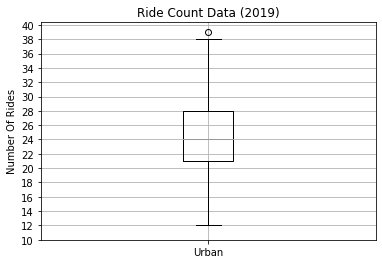

In [253]:
#create a box and whisker plot
x_labels_urban = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels_urban)

#add title
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number Of Rides")
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

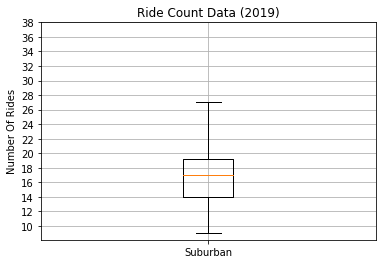

In [255]:
#create B&W plots fot suburban
x_labels_suburban = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels_suburban)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number Of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()



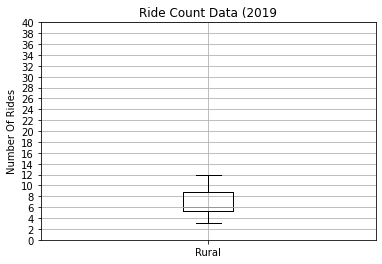

In [261]:
#create B&W for rural
x_labels_rural = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels_rural)

ax.set_title("Ride Count Data (2019")
ax.set_ylabel("Number Of Rides")
ax.set_yticks(np.arange(0, 41, step=2.0))
ax.grid()
plt.show()


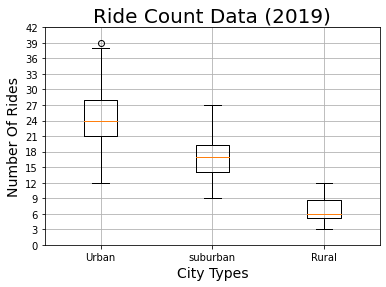

In [268]:
# add all the ride conts in one multi B&W polot
x_labels = ["Urban", "suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots()
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number Of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

plt.savefig("analysis/Fig2.png")
plt.show()

In [273]:
#find the outlier!
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


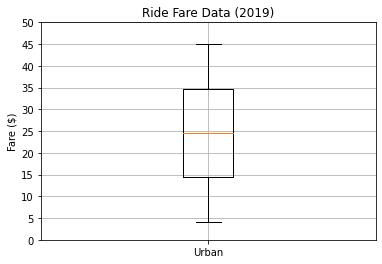

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [275]:
#Create a B&W plot for the ride fare data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

#Add Title and labels
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

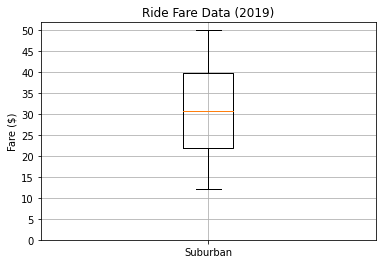

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [276]:
#Create suburban fares B&W plot
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

#Add Title and labels
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

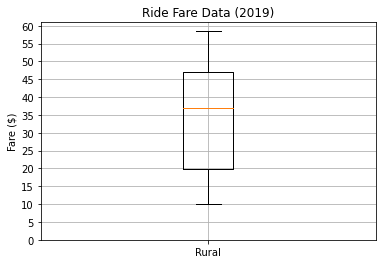

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [278]:
#create a rural fares B&W 
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

#Add Title and labels
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($)")
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

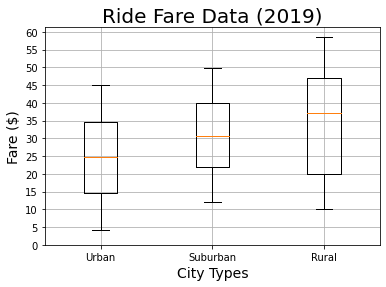

Summary Statistics


In [284]:
x_labels = ["Urban", "Suburban", "Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fares_data, labels=x_labels)

#Add Title and labels
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()

print("Summary Statistics")


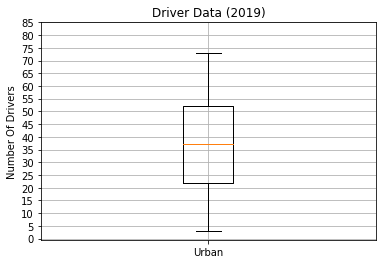

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [288]:
#box and whisker plot for urban driver count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

#Formatting
ax.set_title ("Driver Data (2019)")
ax.set_ylabel("Number Of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

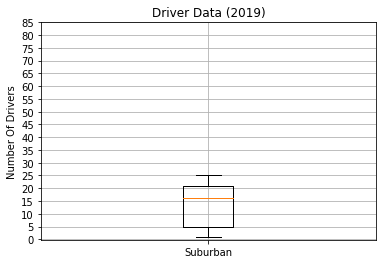

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [289]:
#Create suburban driver count B&W
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

#Formatting
ax.set_title ("Driver Data (2019)")
ax.set_ylabel("Number Of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

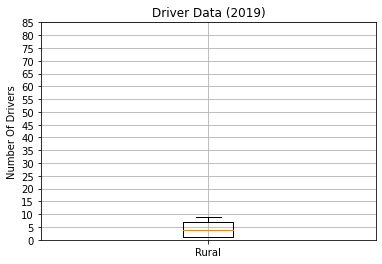

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [290]:
#create a B&W for rural drivers
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

#Formatting
ax.set_title ("Driver Data (2019)")
ax.set_ylabel("Number Of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

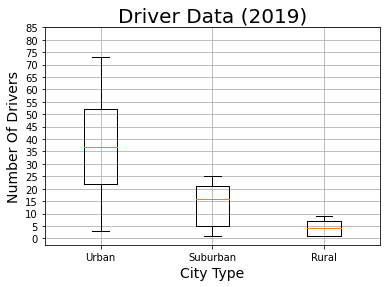

In [293]:
#create a B&W for all 3 types
x_labels = ["Urban", "Suburban", "Rural"]
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(drivers_data, labels=x_labels)

#Formatting
ax.set_title ("Driver Data (2019)", fontsize=20)
ax.set_ylabel("Number Of Drivers", fontsize=14)
ax.set_xlabel("City Type", fontsize=14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()
